# 读取经过第一步处理的数据

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y=np.load("./train_data/Ydata_raw.npy")
x=np.load("./train_data/Xdata_raw.npy")

# 通过密度图来观察，每一个原始物理量的分布

每一列所对应的物理量以及大致范围如下：

从0开头

0  $ \omega_{c}$(0-10000)  1 $c\omega_{c}$(0-8000)  2 $z\omega_{c}$(0-630)  3 $C_{p}$(1000-2230) 

4 $m_{ \omega}$(16-29)  5 $H_{f_{0}}$(-4650000-40)  6 $T$(300-2215)  7 $ \mu$(2.5e-5-0.06) 

8 $Y_{H_{2}O}$(0-0.1)  9 $Y_{CO}$(0-0.1)  10 $Y_{CO_{2}}$(0-0.1)

从1开头

1  $ \omega_{c}$(0-10000)  2 $c\omega_{c}$(0-8000)  3 $z\omega_{c}$(0-630)  4 $C_{p}$(1000-2230) 

5 $m_{ \omega}$(16-29)  6 $H_{f_{0}}$(-4650000-40)  7 $T$(300-2215)  8 $ \mu$(2.5e-5-0.06) 

9 $Y_{H_{2}O}$(0-0.1)  10 $Y_{CO}$(0-0.1)  11 $Y_{CO_{2}}$(0-0.1)

In [3]:
label_texts=["$\omega_{c}$","$c\omega_{c}$","$z\omega_{c}$","$C_{p}$","$m_{\omega}$","$H_{f_{0}}$","$T$","$ \mu$","$Y_{H_{2}O}$","$Y_{CO}$","$Y_{CO_{2}}$"]

(1285200, 4)
(309, 1)
(1, 309)
(309, 4)
[[5.104e-02 6.600e-01 0.000e+00 0.000e+00]
 [5.104e-02 6.800e-01 0.000e+00 0.000e+00]
 [5.104e-02 6.800e-01 1.000e-04 0.000e+00]
 ...
 [6.496e-02 8.200e-01 0.000e+00 0.000e+00]
 [6.496e-02 8.200e-01 1.000e-04 0.000e+00]
 [6.496e-02 8.400e-01 0.000e+00 0.000e+00]]


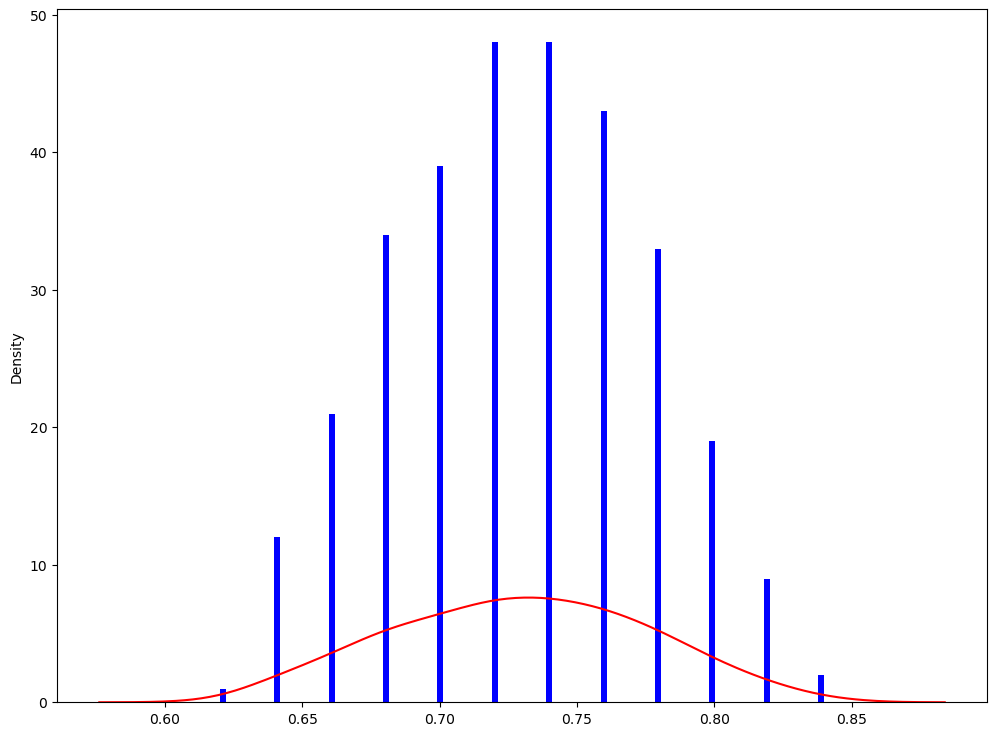

In [16]:
def deleteindex(x,distance):
    min=np.min(x)
    max=np.max(x)
    list_del=np.argwhere(x<min+distance*(max-min))
    # list2=np.argwhere(x[:,i]>up)
    # listdel=np.append(list1,list2)
    # list_del, indices = np.unique(listdel, return_index=True) 
    return list_del
def specialindex(x,distance):
    min=np.min(x)
    max=np.max(x)
    list_spe=np.argwhere(x>min+distance*(max-min))
    # list2=np.argwhere(x[:,i]>up)
    # listdel=np.append(list1,list2)
    # list_del, indices = np.unique(listdel, return_index=True) 
    return list_spe
k=0#这里指定要看哪一个物理量，以0开头
fig, ax = plt.subplots(figsize=(12, 9))
plt.rcParams["font.sans-serif"]=["WenQuanYi Micro Hei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
# list_del=deleteindex(y[:,0],(1/20))
list_spe=specialindex(y[:,0],0.75)
# y_process= np.delete(y, list_del, axis=0)
print(np.shape(x))
print(np.shape(list_spe))
a,b=np.shape(list_spe)
list_spe=np.reshape(list_spe,(b,a))
print(np.shape(list_spe))
xlabels=x[list_spe,:][0]
print(np.shape(xlabels))
ax.hist(xlabels[:,1],bins=100,color='blue')#y_process[:,k],y[:,k],xlabels
sns.kdeplot(xlabels[:,1], ax=ax, color='red')#y_process[:,k],y[:,k],xlabels
plt.savefig("omegac.png")
print(xlabels)

# 这里对数据进行开三次方处理，并查看处理后各物理量的分布，之后进行标准化并将处理后的数据作为给之后的训练提供的数据

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
y=np.load("Ydata_delete_2.npy")
x=np.load("Xdata_delete_2.npy")
print(np.mean(y,axis=0))
print(np.std(y,axis=0))
yabs=np.abs(y)
y3rdroot=np.power(yabs,(1/3))
y=np.where(y>=0,y3rdroot,-y3rdroot)#这里注意要对正数和负数进行分别处理


[ 4.51144133e+02  3.47429805e+02  2.69255663e+01  1.33410987e+03
  2.55946802e+01 -1.59159491e+06  9.99916306e+02  1.60247036e-05
  5.71539025e-02  2.85731409e-02  3.18820138e-02]
[9.57635104e+02 7.54959809e+02 5.36821177e+01 1.62628226e+02
 1.77017072e+00 7.17602966e+05 4.04417962e+02 9.22774848e-06
 3.38056119e-02 2.45774357e-02 2.21533729e-02]


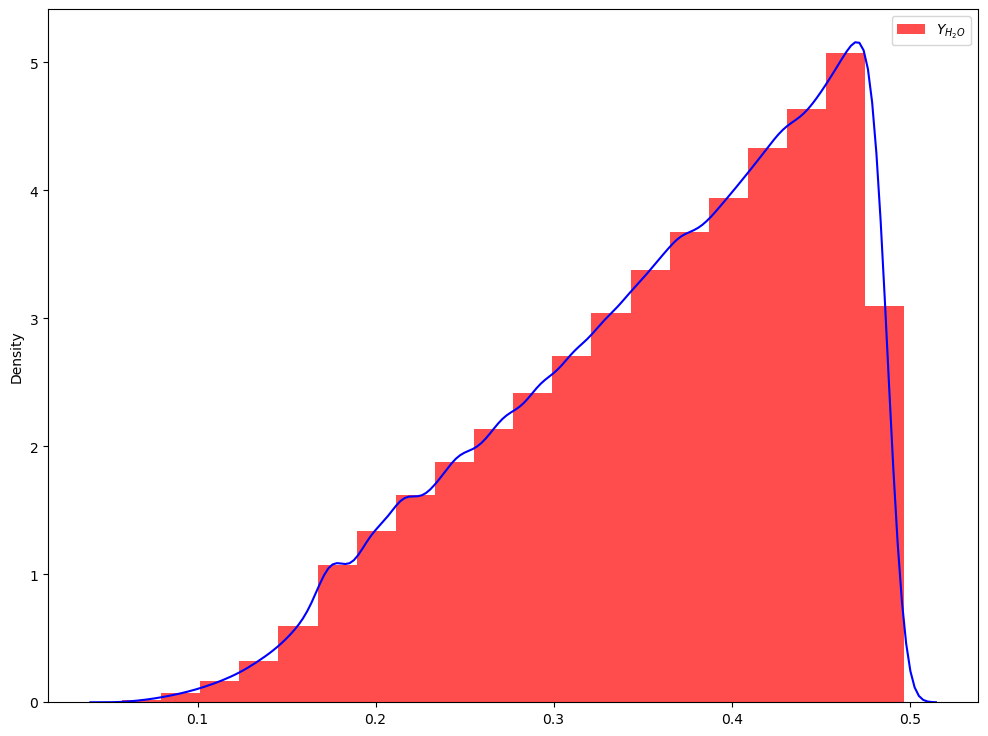

In [17]:
#这里查看开三次根处理之后的各个物理量的分布，每个物理量对应下表见上
k=8
fig, ax = plt.subplots(figsize=(12, 9))
plt.rcParams["font.sans-serif"]=["WenQuanYi Micro Hei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题
ax.hist(y[:,k],bins=20,alpha = 0.7, density=True,color='r',label=label_texts[k])
sns.kdeplot(y[:,k], ax=ax, color='blue')
ax.legend()
plt.show()

In [4]:
#这里要保存好means和stds便于之后结果的还原
phimeans=np.mean(y,axis=0)
phistds=np.std(y,axis=0)
for i in range(len(label_texts)):
    y[:,i]=(y[:,i]-phimeans[i])/phistds[i]
print(np.mean(y,axis=0))
print(np.std(y,axis=0))
np.save("Xdata_process_2",x)
np.save("Ydata_process_2",y)
np.save("phimeans_2",phimeans)
np.save("phistds_2",phistds)

[-2.00561985e-15  1.52899690e-14  5.51808036e-14 -2.22110377e-13
 -3.04339402e-12 -2.12473862e-13 -4.21974193e-13 -2.28136783e-13
  8.68802925e-14  4.54002183e-14  2.03522663e-14]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [5]:
phimin=np.min(y,axis=0)
phimax=np.max(y,axis=0)
for i in range(len(label_texts)):
    y[:,i]=(y[:,i]-phimin[i])/(phimax[i]-phimin[i])
print(np.min(y,axis=0))
print(np.max(y,axis=0))
np.save("./train_data/Xdata_process",x)
np.save("./train_data/Ydata_process",y)
np.save("./train_data/phimin",phimin)
np.save("./train_data/phimax",phimax)

[ 0.  0. nan  0.  0.  0.  0.  0.  0.  0.  0.]
[ 1.  1. nan  1.  1.  1.  1.  1.  1.  1.  1.]


In [9]:
phimean=np.mean(y,axis=0)
ymean_error=np.mean((y - phimean) ** 2,axis=0)
print(ymean_error)
np.save("./train_data/ymean_error",ymean_error)

[0.00499165 0.0046688         nan 0.03403399 0.04073582 0.03945862
 0.04720921 0.04311389 0.07354716 0.07986543 0.02707003]
